In [34]:
from sklearn import tree

In [36]:
clf = tree.DecisionTreeClassifier() 

In [37]:
import pandas as pd
diabetes = pd.read_csv('/content/drive/MyDrive/데싸랩/22-1 정규세션/[정규세션 220208] Decision Tree/diabetes.csv')

In [15]:
print(diabetes.shape)
print(diabetes.columns)
diabetes.head()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
X = diabetes.iloc[:, :-1]
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [39]:
Y = diabetes.Outcome

#train_test_split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#모델훈련

In [41]:
clf = clf.fit(X_train, Y_train)

#그리기

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

!pip install pydot
import pydot
from IPython.core.display import Image 

In [20]:
dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                                class_names = ['0','1'],
                                filled = True, # 색깔 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

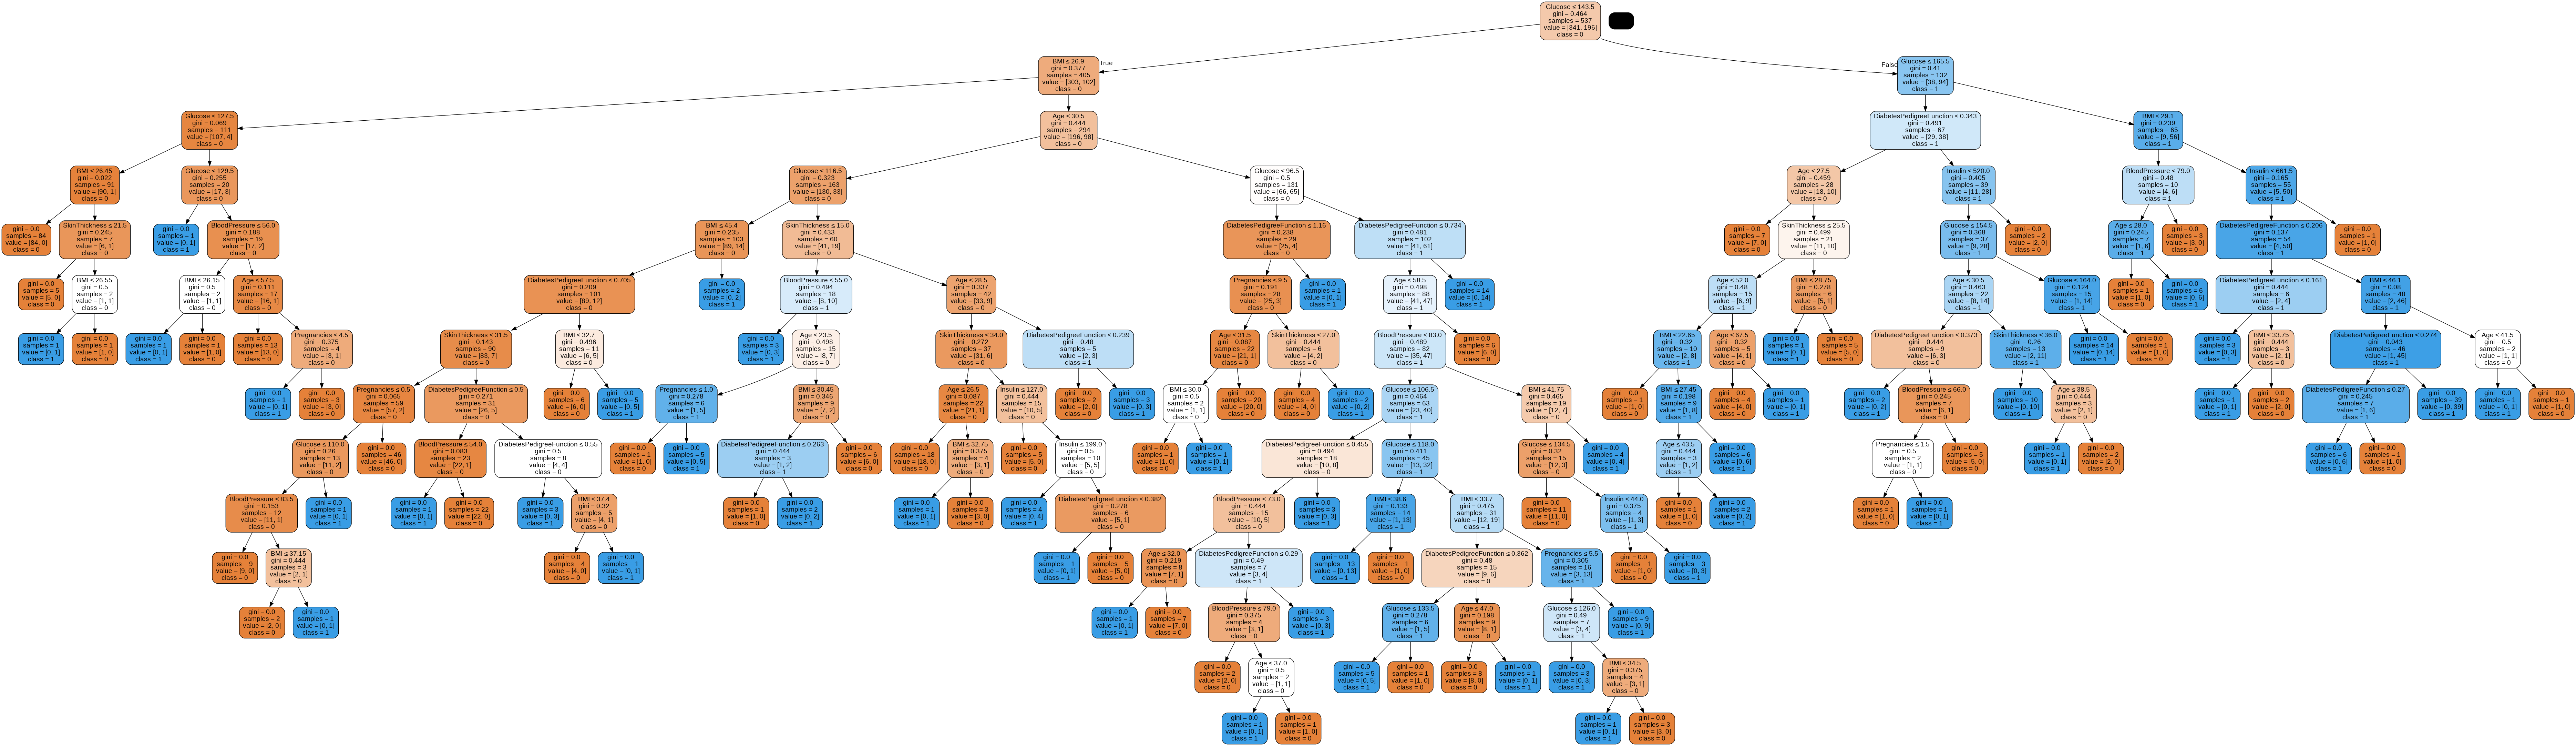

In [21]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

#정확도

In [22]:
Y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.7445887445887446

#사전 가지치기

In [26]:
from sklearn.model_selection import GridSearchCV

hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}
GridCV = GridSearchCV(estimator=clf, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(X_train, Y_train)
GridCV.best_params_ 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 4, 'min_samples_split': 16}

In [43]:
clf_tuned = DecisionTreeClassifier(max_depth= 4, min_samples_split=16)

clf_tuned = clf_tuned.fit(X_train,Y_train)
Y_pred = clf_tuned.predict(X_test)

accuracy_score(Y_test, Y_pred)


0.7532467532467533

In [45]:
dot_data = export_graphviz(clf_tuned, out_file = None, 
                                feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                                class_names = ['0','1'],
                                filled = True, # 색깔 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

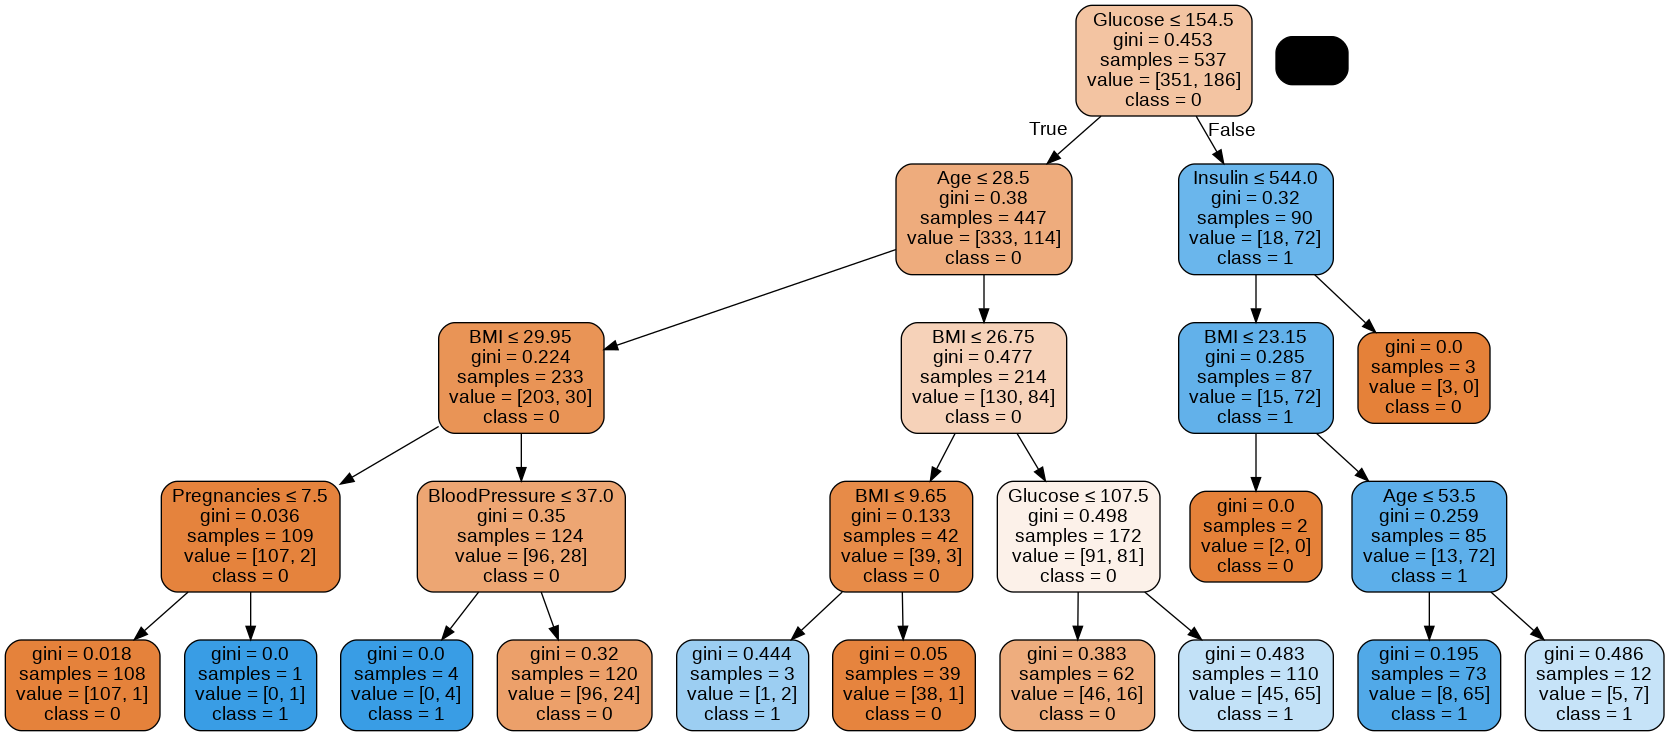

In [46]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)